In [10]:
import numpy as np
import pandas as pd

from PIL import Image, ImageFilter
import cv2

import matplotlib.pyplot as plt

In [11]:
!ls

cat.jpg


# Practicing with Pillow

In [12]:
img = Image.open('cat.jpg')

In [13]:
img.mode

'RGB'

In [14]:
img.size #(W,H)

(1200, 1200)

In [15]:
img.format

'JPEG'

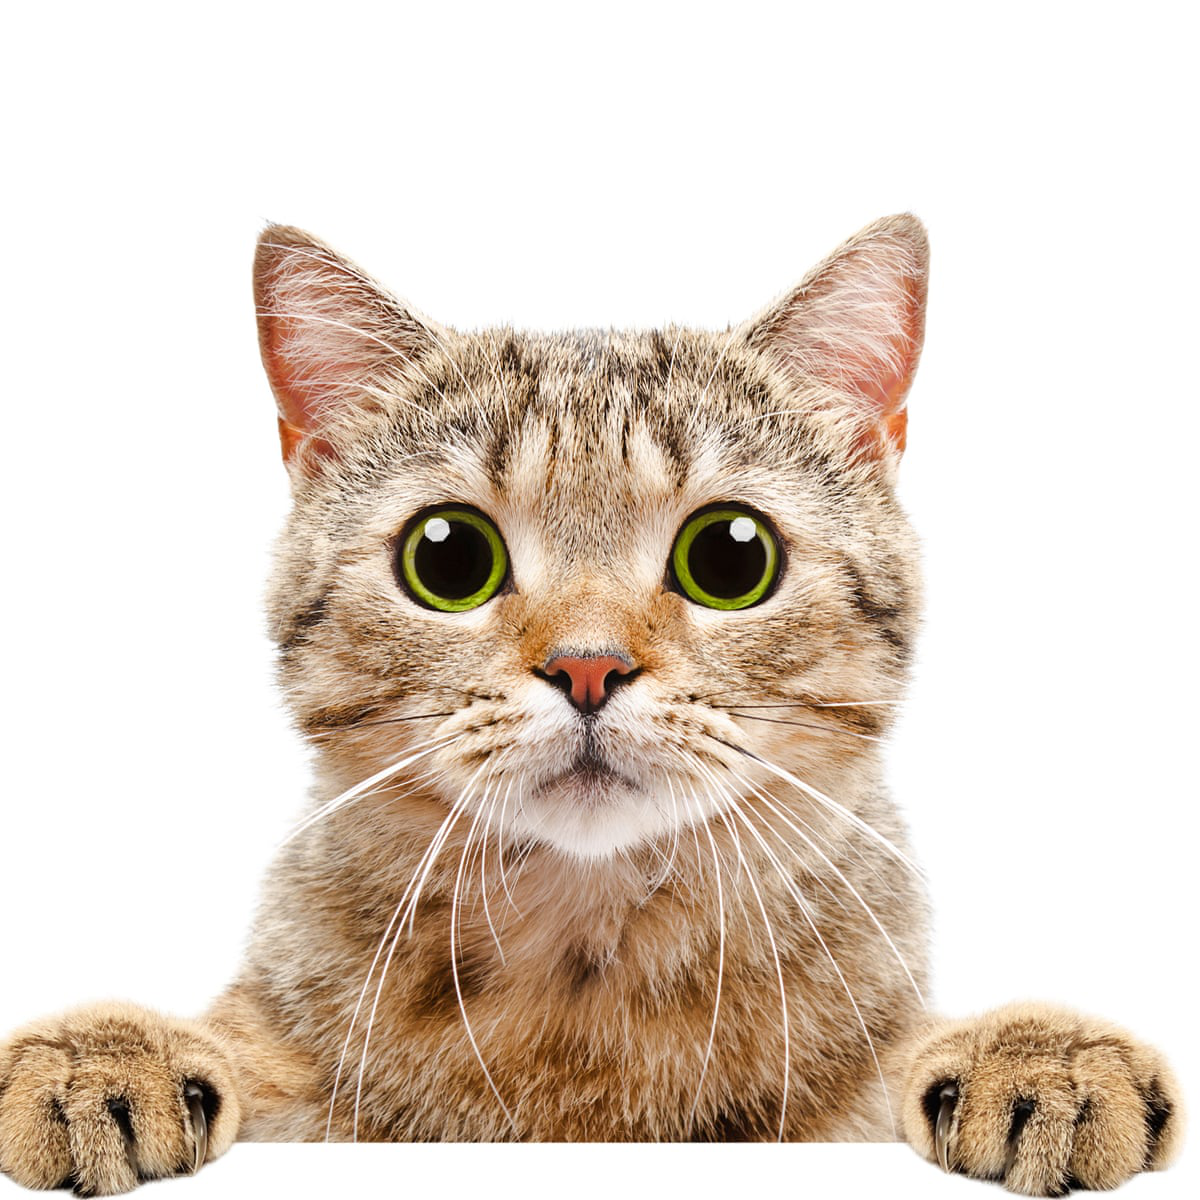

In [16]:
img

In [17]:
image_size = (300,300)
img.thumbnail(image_size) #inplace
img.size

(300, 300)

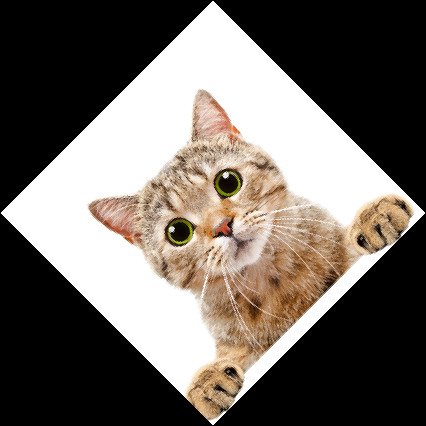

In [18]:
img.rotate(45,expand=True)

In [19]:
image_resized = img.resize((450,600),resample=Image.BICUBIC)
image_resized.size

(450, 600)

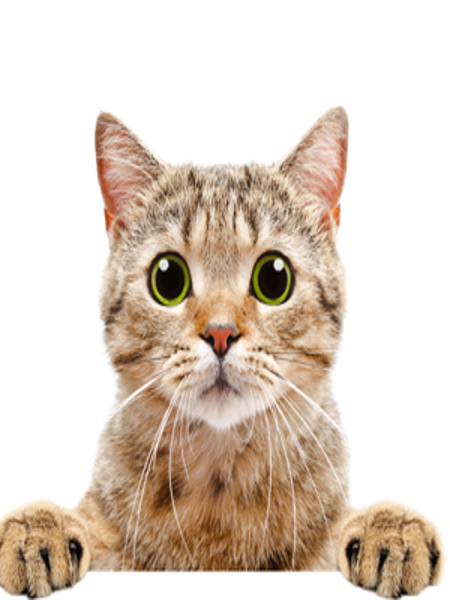

In [20]:
image_resized

In [21]:
# Returns a rectangular region from this image. The box is a 4-tuple defining the left, upper, right, and lower pixel coordinate
image_cropped = img.crop((100, 120, 120, 160)) #X1,Y1,X2,Y2
image_cropped

In [22]:
copy_image = img.copy()
copy_image.size

(300, 300)

In [23]:
copy_image.paste(image_cropped,(50,50))
copy_image.size

(300, 300)

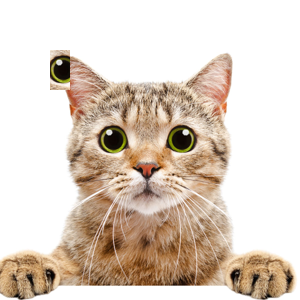

In [24]:
copy_image

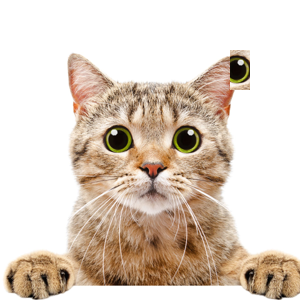

In [25]:
copy_image.transpose(Image.FLIP_LEFT_RIGHT)

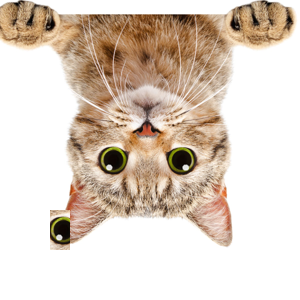

In [26]:
copy_image.transpose(Image.FLIP_TOP_BOTTOM)

# Practicing with OpenCV

In [ ]:
# Instalation 
!pip install opencv-python

In [30]:
img = cv2.imread('./cat.jpg',1) #0:GRAYSCALE #1:COLOR #2:UNCHANGED

In [32]:
type(img)

numpy.ndarray

In [33]:
img.shape

(1200, 1200, 3)

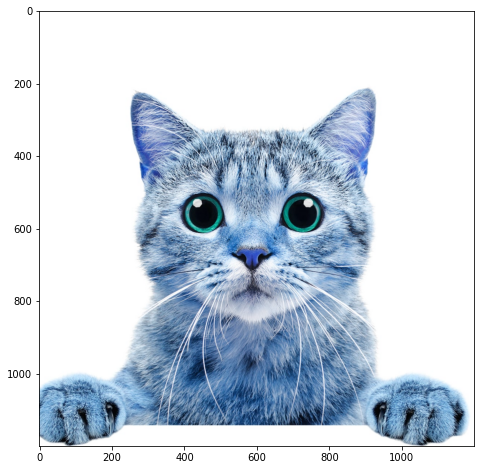

In [35]:
plt.figure(figsize=(8,8))
plt.imshow(img)
plt.show()
# OpenCV reads the image as BGR

In [40]:
cv2.imread('./cat.jpg',0).shape

(1200, 1200)

In [37]:
b,g,r = cv2.split(img)

In [38]:
RGB_img = cv2.merge((r,g,b))

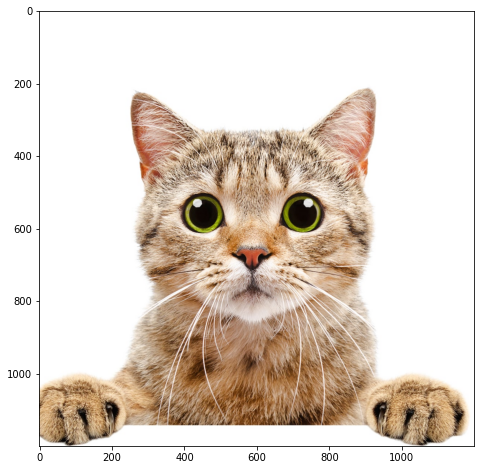

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(RGB_img)
plt.show()

In [42]:
cv2.resize(RGB_img,(450,450),interpolation=cv2.INTER_CUBIC).shape

(450, 450, 3)

In [45]:
resized_image = cv2.resize(RGB_img,None,fx=0.5,fy=0.5,interpolation=cv2.INTER_CUBIC)
resized_image.shape

(600, 600, 3)

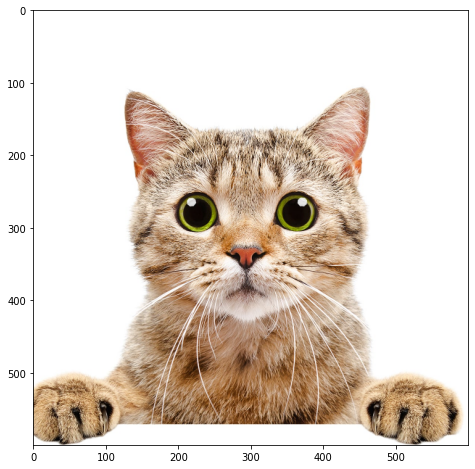

In [46]:
plt.figure(figsize=(8,8))
plt.imshow(resized_image)
plt.show()

In [73]:
kernel = np.ones((20,20),np.float32)/400
kernel2 = np.array([[-1, -1, -1],
                    [-1, 8, -1],
                    [-1, -1, -1]])

In [74]:
#filter2D (src, dst, ddepth, kernel) # Depth of the output image [ -1 will give the output image depth as same as the input image]
filtered_image = cv2.filter2D(RGB_img,-1,kernel2)
filtered_image.shape

(1200, 1200, 3)

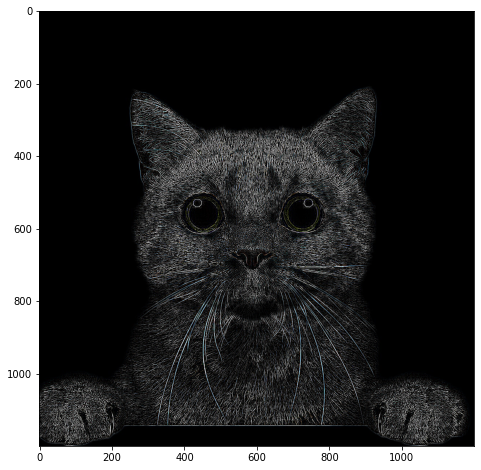

In [75]:
plt.figure(figsize=(8,8))
plt.imshow(filtered_image)
plt.show()

In [72]:
filtered_image[600,600,:]

array([229, 192, 156], dtype=uint16)